
See installation guide at http://scitools.org.uk/cartopy/docs/latest/installing.html#installing.

Download wheel from http://www.lfd.uci.edu/~gohlke/pythonlibs/#cartopy and then pip install:

```
pip install cython
pip install numpy
# GEOS (https://trac.osgeo.org/geos/)
pip install shapely 
pip install pyshp
# PROJ.4 
pip install six
pip install cartopy-0.15.1-cp36-cp36m-win_amd64.whl
??? pip install geos
```
Optional:
```
pip install matplotlib
pip install pillow
pip install scipy
pip install GDAL‑2.1.3‑cp36‑cp36m‑win_amd64.whl
pip install pyepsg
```

Populating the interactive namespace from numpy and matplotlib


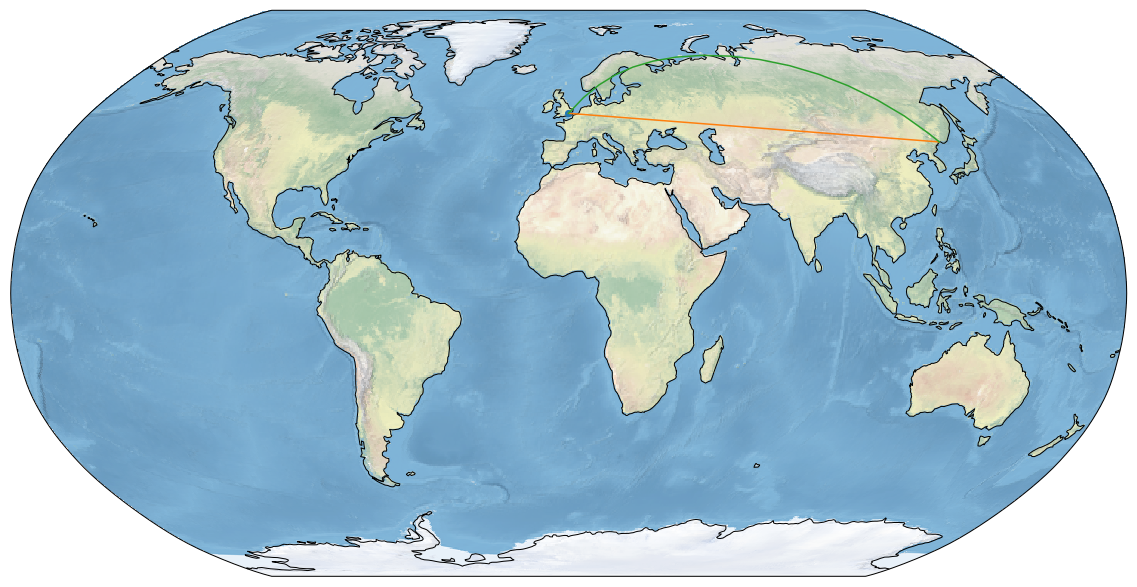

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)
ax = plt.axes(projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

plt.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
plt.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
plt.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

plt.show()
    


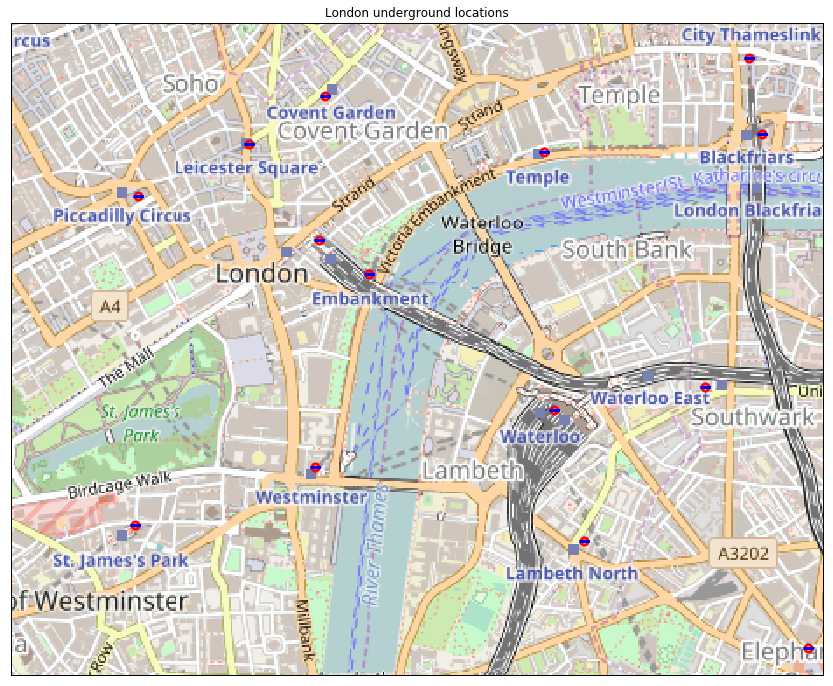

In [15]:
"""
Produces a map showing London Underground station locations with high
resolution background imagery provided by OpenStreetMap.

"""
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM


def tube_locations():
    """
    Returns an (n, 2) array of selected London Tube locations in Ordnance
    Survey GB coordinates.

    Source: http://www.doogal.co.uk/london_stations.php

    """
    return np.array([[531738., 180890.], [532379., 179734.],
                     [531096., 181642.], [530234., 180492.],
                     [531688., 181150.], [530242., 180982.],
                     [531940., 179144.], [530406., 180380.],
                     [529012., 180283.], [530553., 181488.],
                     [531165., 179489.], [529987., 180812.],
                     [532347., 180962.], [529102., 181227.],
                     [529612., 180625.], [531566., 180025.],
                     [529629., 179503.], [532105., 181261.],
                     [530995., 180810.], [529774., 181354.],
                     [528941., 179131.], [531050., 179933.],
                     [530240., 179718.]])


imagery = OSM()

ax = plt.axes(projection=imagery.crs)
ax.set_extent((-0.14, -0.1, 51.495, 51.515))
#ax.set_global()

# Construct concentric circles and a rectangle,
# suitable for a London Underground logo.
theta = np.linspace(0, 2 * np.pi, 100)
circle_verts = np.vstack([np.sin(theta), np.cos(theta)]).T
concentric_circle = Path.make_compound_path(Path(circle_verts[::-1]),
                                            Path(circle_verts * 0.6))

rectangle = Path([[-1.1, -0.2], [1, -0.2], [1, 0.3], [-1.1, 0.3]])

# Add the imagery to the map.
ax.add_image(imagery, 14)

# Plot the locations twice, first with the red concentric circles,
# then with the blue rectangle.

xs, ys = tube_locations().T

plt.plot(xs, ys, transform=ccrs.OSGB(),
         marker=concentric_circle, color='red', markersize=9,
         linestyle='')

plt.title('London underground locations')
plt.show()

